In [1]:
!pip install shap

## Import libraries

In [2]:
import numpy as np
import pandas as pd

## Read data

In [3]:
df = pd.read_csv('data.csv', parse_dates=['Date'])

In [4]:
date_feats = ['year']

In [5]:
for feat in date_feats:
    df[feat] = getattr(df['Date'].dt, feat)

In [6]:
df['day_name'] = df.Date.dt.day_name()
df['month_name'] = df.Date.dt.month_name()

In [7]:
df.head(3)

,Name,Fill_rate,Normal_capacity,Reserve,Date,year,day_name,month_name
0,Oued El Makhazine,72.4,672.9,487.1,2018-10-26,2018,Friday,October
1,Oued El Makhazine,46.5,672.9,312.6,2017-10-26,2017,Thursday,October
2,Hassan II,63.2,392.3,247.9,2018-10-26,2018,Friday,October


## Setup regression parameters

In [8]:
from pycaret.regression import *
exp_reg = setup(df, target='Reserve',train_size=0.8,remove_outliers=True,ignore_features=['Normal_capacity','Date'])

,Description,Value
0,session_id,1214
1,Target,Reserve
2,Original Data,"(16080, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(12220, 34)"


## Compare model

In [9]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,0.7640,213.7666,7.3122,0.9995,0.0341,0.0100,0.0250
rf,Random Forest Regressor,0.6902,213.2461,7.1286,0.9995,0.0386,0.0114,0.5200
et,Extra Trees Regressor,0.8648,235.7544,8.7235,0.9994,0.0518,0.0218,0.6510
lightgbm,Light Gradient Boosting Machine,2.5597,266.7695,10.5007,0.9993,0.0714,0.0353,0.1030
gbr,Gradient Boosting Regressor,16.1470,686.3993,24.9973,0.9982,0.1361,0.0849,0.1780
lr,Linear Regression,76.8140,14277.2606,119.1699,0.9632,0.5356,0.4522,0.3280
ridge,Ridge Regression,76.7827,14277.3787,119.1702,0.9632,0.5352,0.4515,0.0170
lar,Least Angle Regression,76.8713,14279.4935,119.1797,0.9632,0.5364,0.4535,0.0170
br,Bayesian Ridge,76.8099,14277.1948,119.1696,0.9632,0.5355,0.4521,0.0200
lasso,Lasso Regression,76.7162,14467.4696,119.9781,0.9628,0.4901,0.4427,0.0190


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1214, splitter='best')

## Automated ML

In [10]:
automl_model=automl(optimize='MSE')

In [11]:
print(automl_model)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=1214, verbose=0, warm_start=False)


## Create model

In [12]:
model=create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.7817,125.6087,11.2075,0.9997,0.0582,0.0068
1,0.4328,1.5774,1.2559,1.0000,0.0260,0.0028
2,0.5363,4.0924,2.0230,1.0000,0.0044,0.0013
3,0.4975,5.6257,2.3719,1.0000,0.0597,0.0075
4,0.5240,3.6762,1.9173,1.0000,0.0096,0.0017
5,1.9965,1973.1495,44.4201,0.9951,0.1601,0.0832
6,0.5210,2.8365,1.6842,1.0000,0.0038,0.0013
7,0.5267,3.1412,1.7723,1.0000,0.0422,0.0065
8,0.4585,1.7232,1.3127,1.0000,0.0037,0.0013
9,0.6268,11.0300,3.3211,1.0000,0.0179,0.0020


## Interpreting model

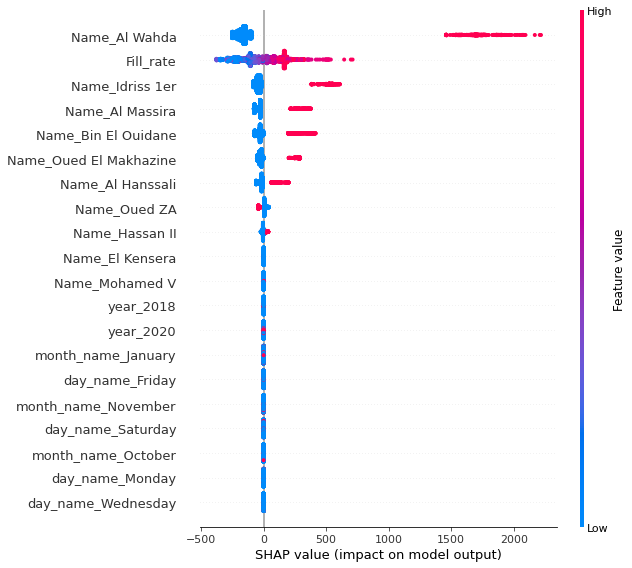

In [13]:
interpret_model(model)

## Predict on test set 

In [14]:
predictions=predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.8456,14.1883,3.7667,1.0000,0.0439,0.0063


## Plotting model

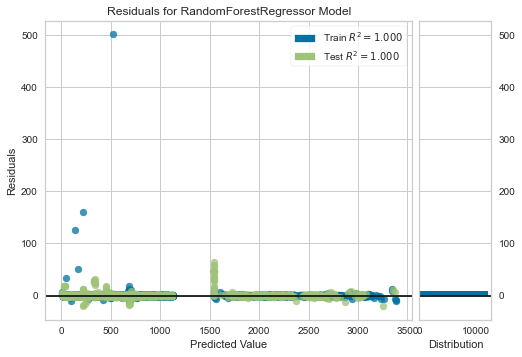

In [15]:
plot_model(model)